# Comparison of two different loss function applied on a single input neuron

-  Single input neuron
-  Sigmoid activation function or linear activation function

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.legend_handler import HandlerLine2D
from matplotlib import cm
from matplotlib.patches import FancyArrowPatch

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
get_ipython().magic('matplotlib inline')

import numpy as np
import math

from scipy import ndimage
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

## Definition of an objective function (loss)

In [2]:
def objective_function(neuron_output, train_output): 
    E = 0.5 * (neuron_output - train_output)**2
    return E

## Definition of neuron output function

In [3]:
def sigmoid(z):
    y = (1/(1+math.exp(-z)))
    return y

In [4]:
def linear_activation(z, 
                      factor = 0.5):
    y = factor * z
    return y

## Definition of single input neuron

In [5]:
def single_input_neuron_function(bias, 
                                 weight, 
                                 input_value=0.7, 
                                 activation = 'linear'): 
    #Intermediate state: z
    z = input_value * weight + bias
    
    #Activation function
    if activation == 'linear':
        y = linear_activation(z)
    elif activation == 'sigmoid':
        y = sigmoid(z)
    else: 
        print('Activation function not implemented!')
        exit()
    return y

## Variation of neuron parameters
With a given neuron input value, a neuron's output is variied in two dimensions according to its bias and weight. 
Those parameters are varyied during training through backpropagation.

In [9]:
#1st dimension: bias
bias = np.arange(-4., 4., 0.2)
#2nd dimension: weight
weight = np.arange(-4., 4., 0.2)

#2D arrays
X, Y = np.meshgrid(bias, weight)
print('Bias matrix: {}'.format(X.shape))
print('Weight matrix: {}'.format(Y.shape))

# 3rd dimension: error
error = np.zeros((bias.shape[0], weight.shape[0]))

Bias matrix: (40, 40)
Weight matrix: (40, 40)


## Neuron output by mapping from default input to output

In [12]:
for b_idx, b in enumerate(bias): 
    for w_idx, w in enumerate(weight): 
        error[b_idx, w_idx] = objective_function(single_input_neuron_function(b, 
                                                                              w, 
                                                                              input_value=1, 
                                                                              activation= 'sigmoid'), 
                                                 train_output = 0)
    
print('Error matrix: {}'.format(error.shape))

Error matrix: (40, 40)


/home/paul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  if __name__ == '__main__':
/home/paul/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


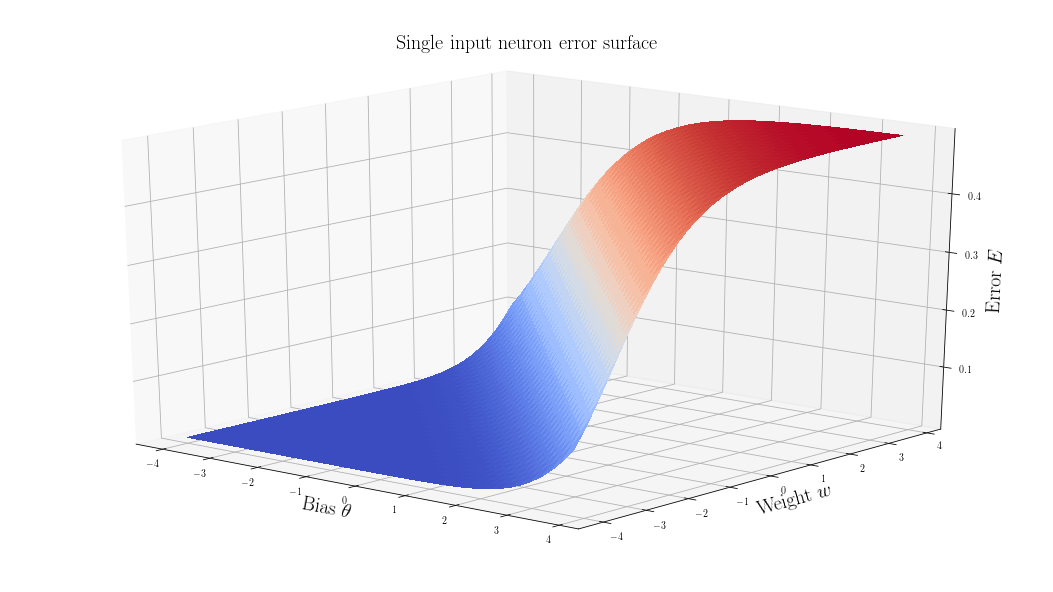

In [13]:
# Set figure
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.grid(True)

# Plot properties
ax = fig.gca(projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, error, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Set the label properties
ax.set_xlabel(r'Bias $\theta$', fontsize=20)
ax.set_ylabel(r'Weight $w$', fontsize=20)
ax.set_zlabel(r'Error $E$', fontsize=20)

# Rotation
ax.view_init(20, -50)
plt.title(r"Single input neuron error surface", fontsize=20, color='black')

# Plot
plt.show()

In [ ]:
# Save current figure 
fig.savefig('single_input_neuron_error_surface.eps', format='eps', dpi=1000, bbox_inches = 'tight')

## Train on binary task: 1 --> 0 

In [15]:
# Set initial weight value
w_init = np.random.rand()*1
w_init = 2 #1.05

# Set initial basis value
b_init = np.random.rand()*1
b_init = 2 #1

# Set input and output to train for 
input_value = 1
output_aim = 0

# Set training properties
epochs = 350
error_mse=np.zeros(epochs)
bias_mse=np.zeros(epochs)
weight_mse=np.zeros(epochs)

c=np.zeros(epochs)
epoch=np.zeros(epochs)

# Learning rate
lr = 0.21

In [16]:
# MSE - First epoch
error_mse[0] = objective_function(single_input_neuron_function(b_init, 
                                                               w_init, 
                                                               activation = 'sigmoid'), 
                                  train_output = output_aim)

# Neuron states
o_m = single_input_neuron_function(b_init, w_init, activation = 'sigmoid')
b = b_init
w = w_init

# Set previous states in separate arrays
epoch[0] = 0
bias_mse[0] = b
weight_mse[0] = w

# Training
for i in range(epochs-1): 
    #Bias gradient
    bias_grad = (o_m - 0)*o_m*(1-o_m)
    #Weight gradient
    weight_grad = input_value*(o_m - 0)*o_m*(1-o_m)
    
    # Gradient estimation
    b = b - lr*bias_grad
    w = w - lr*weight_grad
    
    # Calculate next error state
    error_mse[i+1] = objective_function(single_input_neuron_function(bias = b, 
                                                                     weight = w, 
                                                                     input_value = input_value, 
                                                                     activation = 'sigmoid'), 
                                        train_output = output_aim)
    # Save neuron states
    bias_mse[i+1] = b
    weight_mse[i+1] = w
    epoch[i+1] = i+1
    
    # Intermediate state (needed with gradient updated bias and weight for next gradient computation in beginning of loop)
    o_m = single_input_neuron_function(b, w, activation = 'sigmoid')

# Use latest bias and weight after training as trained values for prediction
trained_out = single_input_neuron_function(b,w, input_value = input_value, activation = 'sigmoid')

print('Final output value: {}'.format(trained_out))
print('Final network bias: {}'.format(b))
print('Final network weight: {}'.format(w))
#error_mse[1]

Final output value: 0.0635233755375736
Final network bias: -1.3453583020898927
Final network weight: -1.3453583020898927


## Train with new loss: Cross entropy

In [17]:
def objective_function_cross(neuron_output, train_output): 
    E = -train_output * np.log(neuron_output) - (1-train_output)*np.log(1-neuron_output)
    return E

In [22]:
# Set initial weight - For comparison --> Same values as with MSE loss
w_init_cross = np.random.rand()*1
w_init_cross = 2 #1.05

# Set initial bias
b_init_cross = np.random.rand()*1
b_init_cross = 2 #1

# Set training properties
epochs_cross = 350
error_cross=np.zeros(epochs_cross)
weight_cross=np.zeros(epochs_cross)
bias_cross=np.zeros(epochs_cross)

epoch_cross=np.zeros(epochs_cross)

# Learning rate
lr = 0.21

In [23]:
# Calculation for first iteration
error_cross[0] = objective_function_cross(single_input_neuron_function(b_init_cross, 
                                                                       w_init_cross, 
                                                                       activation = 'sigmoid'), 
                                          train_output = output_aim)
# Intermediate states 
o_m_cross = single_input_neuron_function(b_init_cross, 
                                         w_init_cross, 
                                         activation = 'sigmoid')
b_cross = b_init_cross
w_cross = w_init_cross

# Save states in array
epoch_cross[0] = 0
bias_cross[0] = b_cross
weight_cross[0] = w_cross

# Training
for i in range(epochs_cross-1): 
    #Bias gradient
    bias_grad_cross = (o_m_cross - 0)
    #Weight gradient
    weight_grad_cross = input_value*(o_m_cross - 0)
    
    #Gradient estimation
    b_cross = b_cross - lr*bias_grad_cross
    w_cross = w_cross - lr*weight_grad_cross
    
    error_cross[i+1] = objective_function_cross(single_input_neuron_function(bias = b_cross, 
                                                                             weight = w_cross, 
                                                                             input_value = input_value, 
                                                                             activation = 'sigmoid'), 
                                                train_output = output_aim)
    # Save states
    bias_cross[i+1] = b_cross
    weight_cross[i+1] = w_cross
    epoch_cross[i+1] = i+1
    
    # Save neuron state for gradient calculation in next epoch
    o_m_cross = single_input_neuron_function(b_cross, w_cross, activation = 'sigmoid')

# Final neuron usage for prediction with latest trained state values
trained_out_cross = single_input_neuron_function(b_cross, w_cross, input_value = input_value, activation = 'sigmoid')
print('Final output value: {}'.format(trained_out_cross))
print('Final network bias: {}'.format(b_cross))
print('Final network weight: {}'.format(w_cross))

Final output value: 0.0036633615921449533
Final network bias: -2.8028519985845346
Final network weight: -2.8028519985845346


## Comparison of the loss progress of both error functions at simple neuron and training state

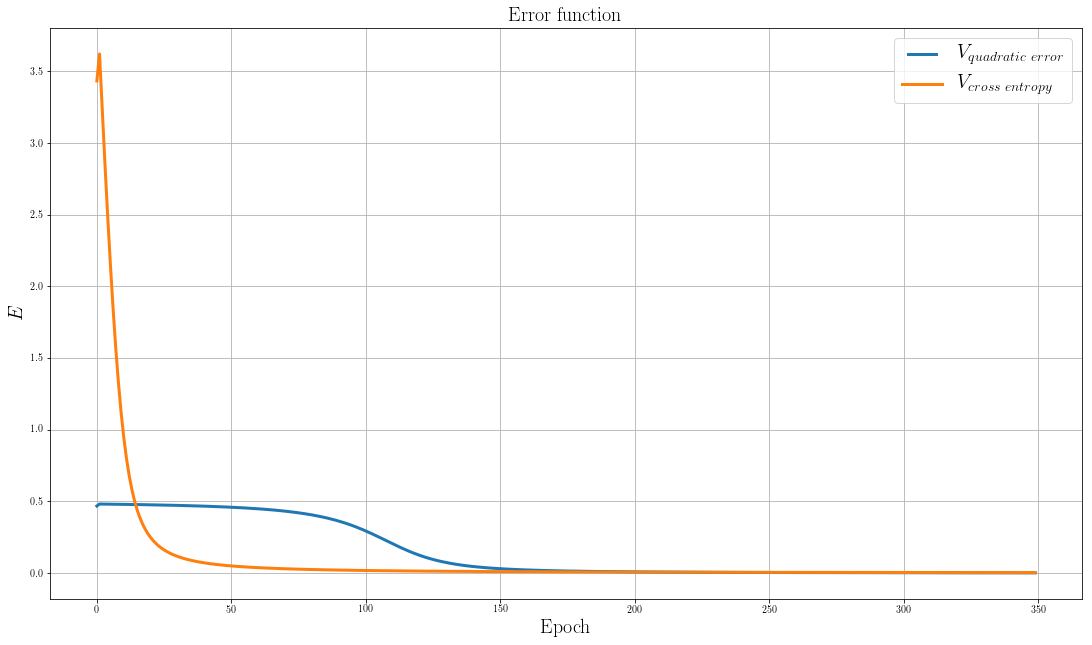

In [24]:
# Set figure properties
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Set plot properties
plt.grid(True)
plt.xlabel(r'Epoch', fontsize=20)
plt.ylabel(r'$E$', fontsize=20)
plt.title(r"Error function", fontsize=20, color='black')

# Set legend properties
line1, = plt.plot(epoch, error_mse, linewidth = 3, label=r'$V_{quadratic\,\,error}$')
line2, = plt.plot(epoch_cross, error_cross, linewidth = 3, label=r'$V_{cross\,\,entropy}$')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=10)}, prop={'size': 20})

# Direct comparison on previously showed error surface with different neuronal states variation

/home/paul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  if __name__ == '__main__':
/home/paul/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0.92,'Single input neuron error surface (MSE, sigmoid activation)')

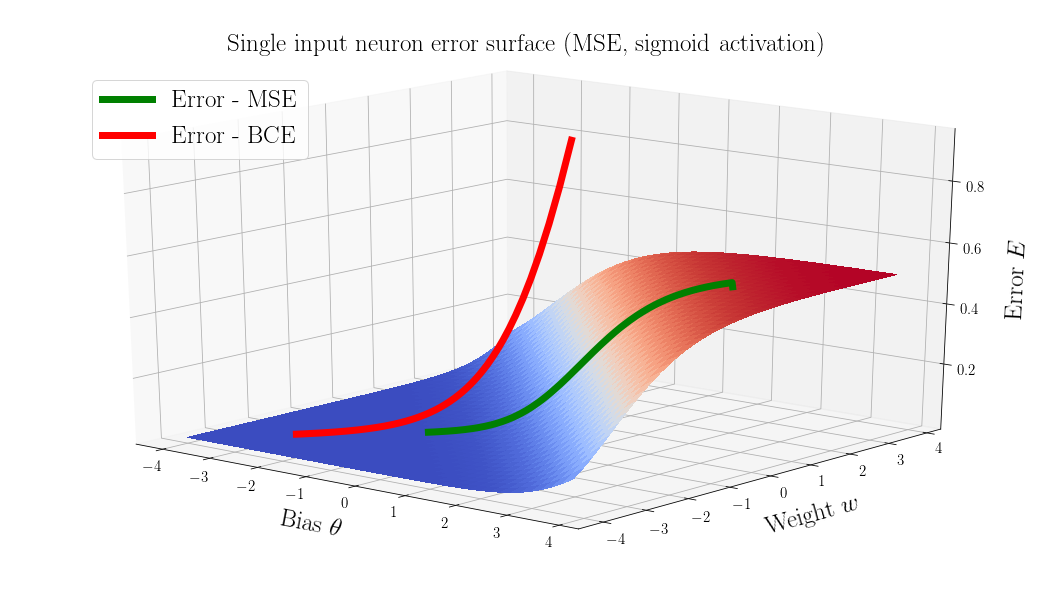

In [25]:
# Set figure properties
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.grid(True)

# Set plot
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, error, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#bias: X, weight: Y, Z:error_mse
mse_curve = ax.plot(bias_mse, weight_mse, error_mse, zdir='z', color= 'green', linewidth=7, label=r'Error - MSE')
cross_curve = ax.plot(bias_cross[10:], weight_cross[10:], error_cross[10:], zdir='z', color= 'red', linewidth=7, 
                      label=r'Error - BCE')

# Set labels
ax.set_xlabel(r'Bias $\theta$', fontsize=25, labelpad=20)
ax.set_ylabel(r'Weight $w$', fontsize=25, labelpad=20)
ax.set_zlabel(r'Error $E$', fontsize=25, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# Set legend
ax.legend( numpoints = 1, fontsize=25, bbox_to_anchor=(0.3, 0.9))

# Set rotation
ax.view_init(20, -50)

# Set title
plt.title(r"Single input neuron error surface (MSE, sigmoid activation)", fontsize=25, color='black')

In [150]:
# Save current figure
fig.savefig('single_input_neuron_error_surface_with_error_comparison.eps', format='eps', dpi=1000, bbox_inches = 'tight')